In [80]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

In [81]:
(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [82]:
x_train.shape

(60000, 28, 28)

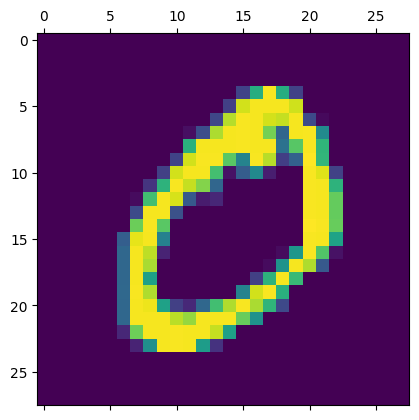

In [83]:
plt.matshow(x_train[1])

In [84]:
y_train[1]

0

In [85]:
x_train= x_train/ 255
x_test = x_test /255

In [100]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation= 'tanh'),
    keras.layers.Dense(10, activation= 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8669 - loss: 0.4613
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9534 - loss: 0.1575


In [88]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 0.1310


[0.11895550787448883, 0.9635000228881836]

In [93]:
y_pred=model.predict(x_test)
y_pred[0]
np.argmax(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7

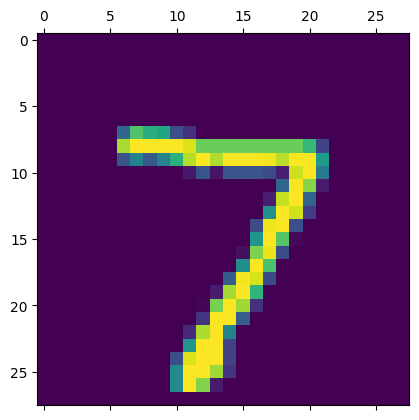

In [95]:
plt.matshow(x_test[0])

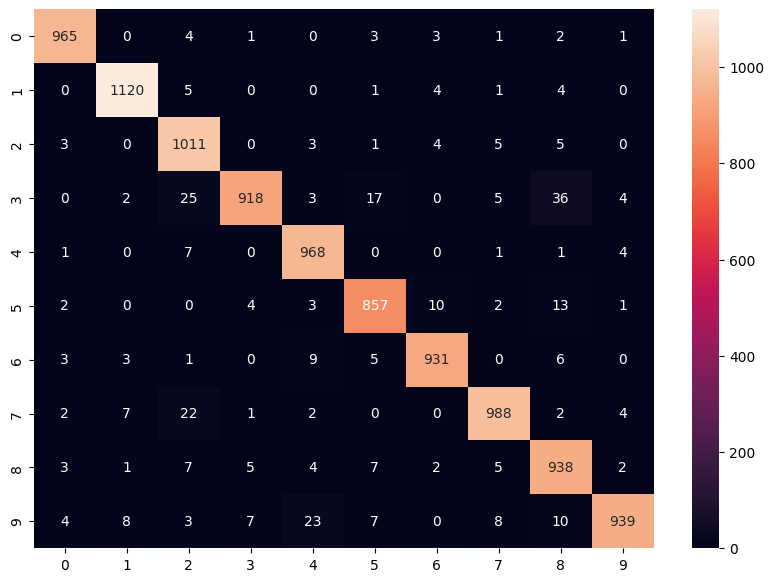

In [97]:
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.show()